<a href="https://colab.research.google.com/github/BizTechInnovatorShresthathe/Snapchat-Ad-Analysis-Tableau-Project/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:** We have consolidated the data for each of the player sold in the IPL 2022 auction and that of the reatained players from
each franchise.

**The data Contains information like**-matches played, runs, wickets, average, strike rate, catches, runouts, stumps, etc.

**Based on these data points** - we will try to create the best 11 from these set of players from the current campaign.
We can summarize our analysis in the following steps:
1. Extraction and loading the data.
2. Cleaning the data and removing the noise.
3. Analyze the data on different parameters.
4. Visualizing the important statistical findings.
5. Making the best team of 11 - based on the ICC world cup winning squad formation and last year's squad formation of the winning team in
the IPL. i.e how many batters, bowlers and allrounders should be included in the team.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
data = pd.read_csv ("IPLData.csv")

In [162]:
data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
#describe function will return the necessary information like count, mean, std deviation, etc for the entire dataset.
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [164]:
#we can check the number of null values using the isna().sum() method.
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [165]:
#The info method will return the information about the dataset like the non null objects, and the data type of each of the elements in the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

# **Cleaning The Data**
                                                                                              
In the above data, the players can be initially segragated based on following parameters
   1. Capped-Batters, Bowlers, Allrounders, Wicket Keeper
   2. Uncapped - Batters, Bowlers, Allrounders, Wicket keepers
The uncapped players are playing the IPL for the first time, or relavant data isn't available therefore we have used their domestic T20
performances, and T20 international performances.




In [166]:
   #segregating Data - Capped Batters two have kept the batting parameters to restrict the analysis for batter specific tendencies.
   
batters = data.loc[data["Player_Type"] == "Batter"]
batters_new = batters.loc[(batters["Capped"] ==1)]
Capped_Batters = batters_new[['Player Name',
                        'Team',
                        'Nationality',
                        'Matches_Played',
                        'Runs',
                        'Average',
                        'Strike_Rate']]

In [167]:
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [168]:
#segregating Data - Capped Bowlers
#we have only kept the bowling parameters, since we will purely judge the bowlers on their bowling statistics.
bowlers = data.loc[data[ "Player_Type"] == "Bowler "]
bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]
Capped_Bowlers = bowlers_new[[ 'Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Wickets',
                            'Bowling_average',
                            'Economy',
                            'Bowling_Strike_Rate']]


In [169]:
Capped_Bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


In [170]:
#segregating Data - Capped Keepers
 #bie are only keeping the relavant-parameters for the keepers, since bowling figures are not needed for the wicket-keepers.
Keepers = data.loc[(data["Player_Type"] == "Keeper")]
Keepers_new = Keepers.loc[(Keepers["Capped"] == 1)]

Capped_Keepers = Keepers_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Runs',
                            'Average',
                            'Strike_Rate',
                            'Catches',
                            'Run_outs',
                            'Stumps']]


In [171]:
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [172]:
#segregating Data - Capped Allrounders
#we have kept the bowling and batting parameters for the allrounders to analyze all round performance.
Allrounders = data.loc[(data["Player_Type"] == "Allrounder")]

Allrounders_new = Allrounders.loc[(Allrounders["Capped"] == 1)]
Capped_Allrounders = Allrounders_new[['Player Name',
                            'Team',
                            'Nationality',
                            'Matches_Played',
                            'Runs',
                            'Average',
                            'Strike_Rate',
                            'Wickets',
                            'Bowling_average',
                            'Economy',
                            'Bowling_Strike_Rate']]

 


In [173]:
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [174]:
#Cleaning the data by making the null or NAN values 0.

Capped_Batters = Capped_Batters.fillna(0)
Capped_Bowlers = Capped_Bowlers.fillna(0)
Capped_Allrounders = Capped_Allrounders.fillna(0)
Capped_Keepers = Capped_Keepers.fillna(0)


In [175]:
#checking null values in the data

print(Capped_Batters.isna().sum())
print(Capped_Bowlers.isna().sum())
print (Capped_Allrounders.isna().sum())
print(Capped_Keepers.isna().sum())


Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


## **Initial Analysis**

In this section, we will analyze data for batters, bowlers, keepers and allrounders.


In [176]:
#analyzing the Batters Data
#Here we have narrowed our analysis to batters who have a batting average more the 32.0
top_batters = Capped_Batters.loc[(Capped_Batters["Average"] >= 32.0)]

#Sorting the data in descending order - with respect to each parameter
top_batters_average = top_batters.sort_values('Average', ascending=False)
top_batters_strike_rate = top_batters.sort_values('Strike_Rate', ascending=False)
top_batters_runs = top_batters.sort_values('Runs', ascending=False)
top_batters_matches = top_batters.sort_values('Matches_Played', ascending=False)


In [177]:
#the data of each of the batters in descending order of batting averages.
top_batters_average.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95


In [178]:
top_batters_strike_rate.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27


In [179]:
top_batters_runs.head(5)

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09


In [180]:
top_batters_matches.head(5)

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38


From our analysis, if we rank from 0-10, the top three batters that will come while analysis each of the above data are:

1. David Warner
2. KL Rahul
3. Virat Kohli 


In [181]:
#analyzing the Bowlers Data
#here we have narrowed our analysis based on the bowling averages of the players to be less than 24.0
top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"] <= 24.0)]

top_bowlers_average = top_bowlers.sort_values( 'Bowling_average')
top_bowlers_strike_rate = top_bowlers.sort_values('Bowling_Strike_Rate')
top_bowlers_wickets = top_bowlers.sort_values( 'Wickets', ascending=False)
top_bowlers_economy = top_bowlers.sort_values( 'Economy' )
top_bowlers_matches = top_bowlers.sort_values('Matches_Played', ascending=False)


In [182]:
top_bowlers_average.head(8)

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48


In [183]:
top_bowlers_strike_rate.head(8)

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12


In [184]:
top_bowlers_wickets.head(8)

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96


In [185]:
top_bowlers_economy.head(8)

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96


In [186]:
top_bowlers_matches.head(8)

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96


From the above analysis, if we rank down the parameters from 1-10. The top bowling options are as follows:

1. Kagiso Rabada

2. Jasprit Bumrah

3. Yuzvendra Chahai

4. Nathan Coulter-Nile 


In [187]:
#Analyzing the Allrounder Data

top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders["Strike_Rate"] >= 140.0)]

top_allrounders_average = top_allrounders.sort_values( 'Average', ascending=False)
top_allrounders_strike_rate = top_allrounders.sort_values('Strike_Rate', ascending=False)
top_allrounders_runs = top_allrounders.sort_values('Runs', ascending=False)
top_allrounders_bowling_average = top_allrounders.sort_values('Bowling_average')
top_allrounders_bowling_strike_rate = top_allrounders.sort_values( 'Bowling_Strike_Rate')
top_allrounders_wickets = top_allrounders.sort_values( 'Wickets', ascending=False)
top_allrounders_economy = top_allrounders.sort_values('Economy')
top_allrounders_matches = top_allrounders.sort_values( 'Matches_Played', ascending=False)


In [188]:
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [189]:
top_allrounders_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [190]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [191]:
top_allrounders_bowling_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [192]:
top_allrounders_bowling_strike_rate 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [193]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [194]:
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51


In [195]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


From the above analysis, if we rank down the allrounders from 1-10 on various parameters. The top allrounder options are as follows:
1. Andre Russell I
2. Sunil Narine
3. Hardik Pandya
4. Jofra Archer


In [196]:
#Analyzing the Keepers Data
#we have narrowed our analysis down to keepers averaging more than 25.0
top_keepers = Capped_Keepers.loc[(Capped_Keepers["Average"] >= 25.0)]
#Sorting the data in descending order - with respect to each parameter.
top_Keepers_average = top_keepers.sort_values( 'Average', ascending=False)
top_Keepers_strike_rate = top_keepers.sort_values( 'Strike_Rate', ascending=False)
top_Keepers_runs = top_keepers.sort_values('Runs', ascending=False)
top_Keepers_matches = top_keepers.sort_values('Matches_Played', ascending=False)
top_Keepers_catches = top_keepers.sort_values( 'Catches',ascending=False)
top_Keepers_runouts = top_keepers.sort_values('Run_outs',ascending=False)
top_Keepers_stumps = top_keepers.sort_values( 'Stumps', ascending=False)



In [197]:
top_Keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


In [198]:
top_Keepers_runouts 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [199]:
top_Keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [200]:
top_Keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [201]:
top_Keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [202]:
top_Keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [203]:
top_Keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


if we rank the keepers in order of 1-10 on the above parameters. The top 3 keepers will be
1. MS Dhoni
2. Dinesh Karthik
3. Rishabh Pant


# **Visualization For Enhanced Analysis**

Now, the initial analysis that has been done on the segregated data. You can create a few visual representations of the same to get better
analysis of the data.


<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

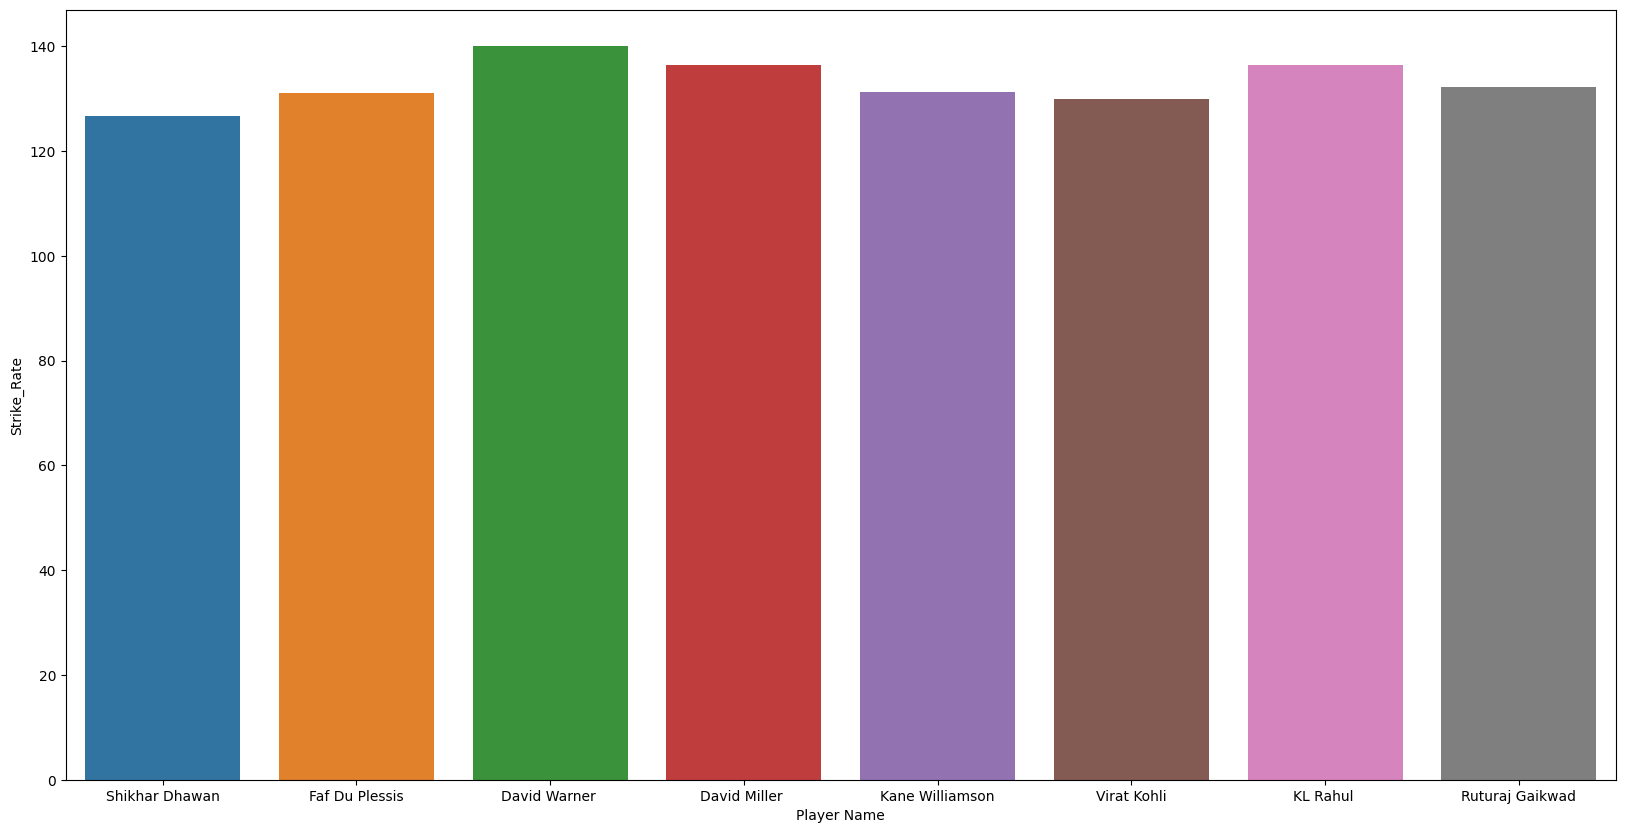

In [204]:
#Visuatization of Batters data 
#the plot shows each of the top batters strike rate.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_batters)


<Axes: xlabel='Player Name', ylabel='Runs'>

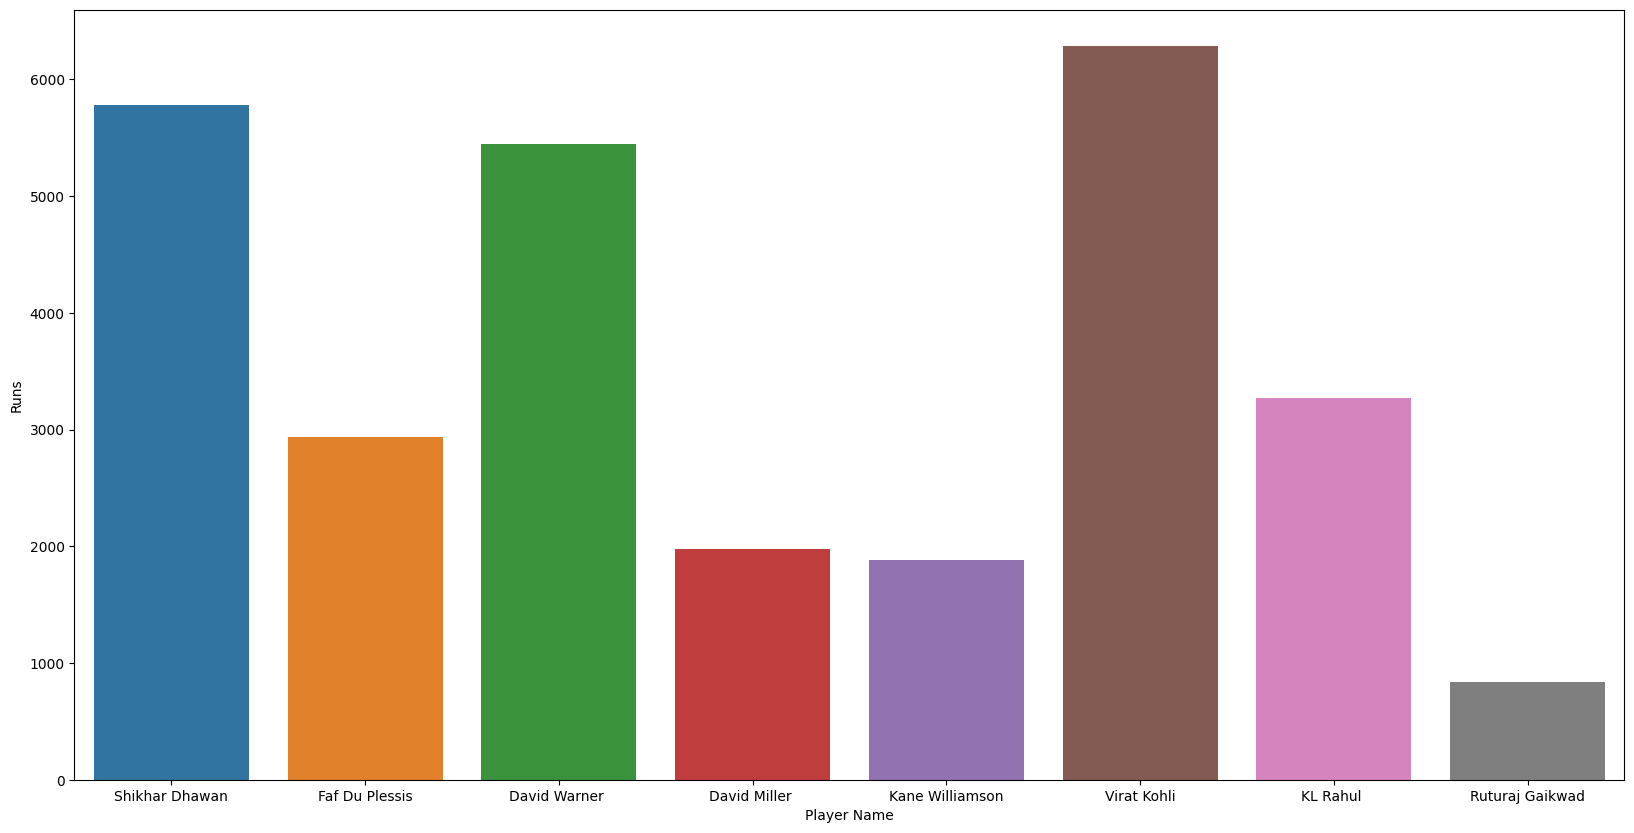

In [205]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data=top_batters)

<Axes: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

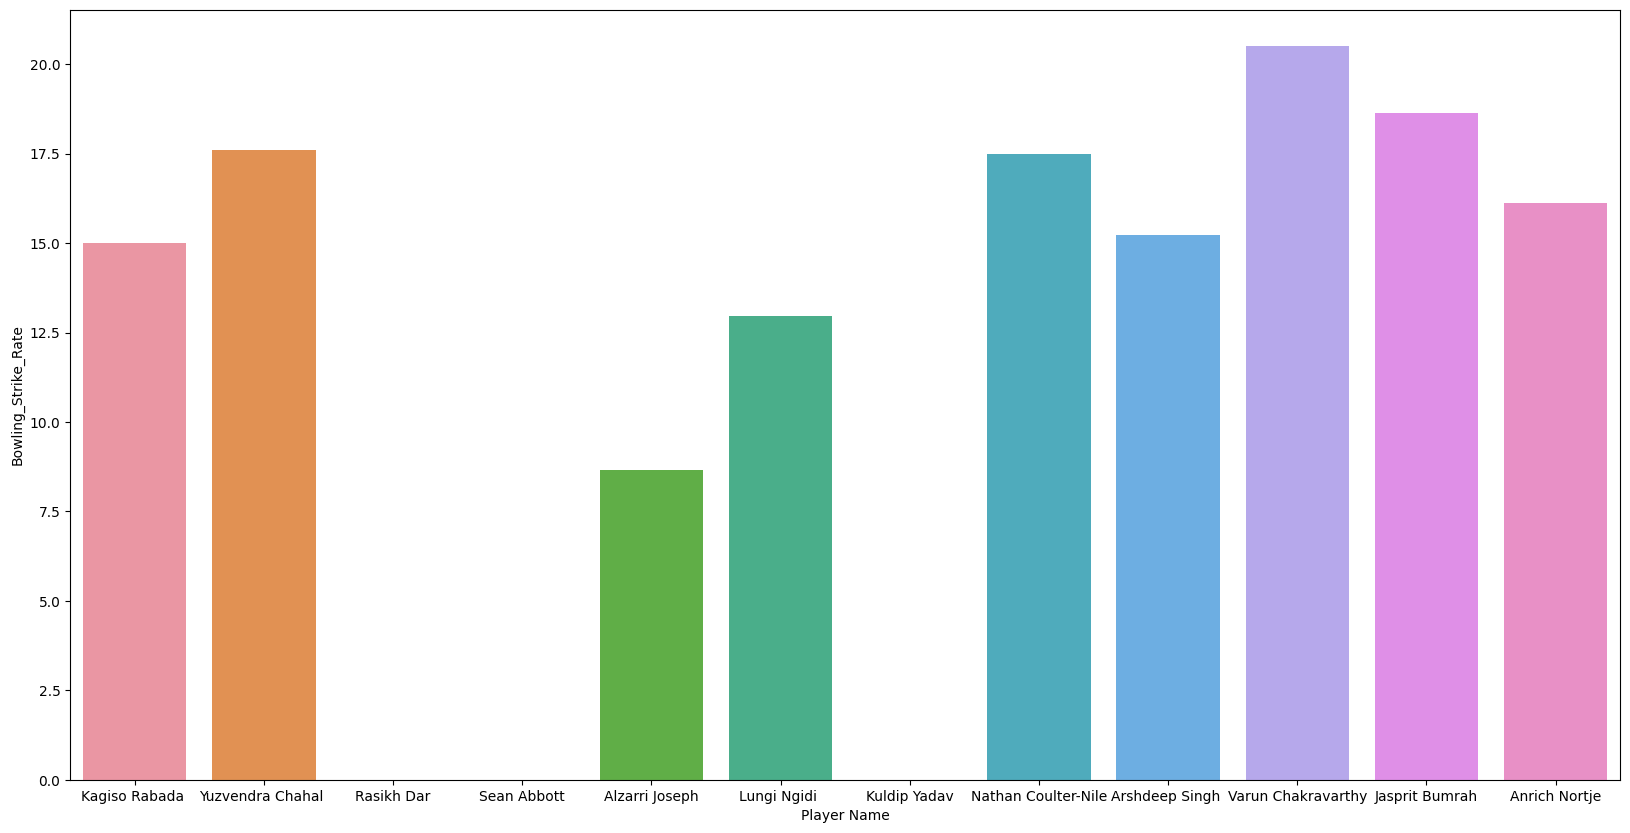

In [206]:
#Visuatization of Bowler data 
#the plot shows each of the top Bowler strike rate.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Bowling_Strike_Rate', data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Economy'>

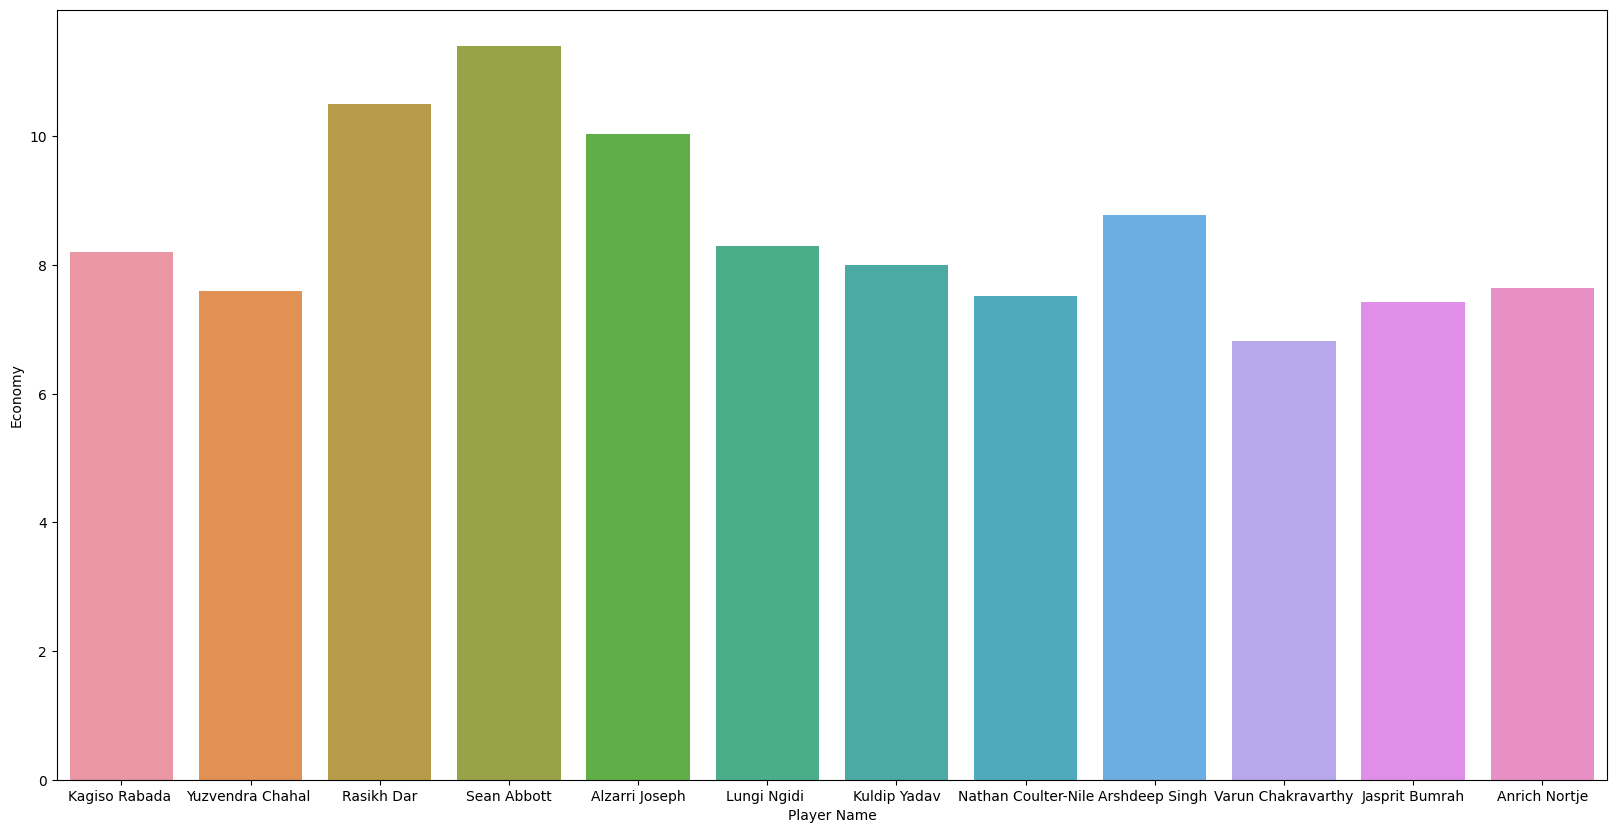

In [207]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Economy', data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Average'>

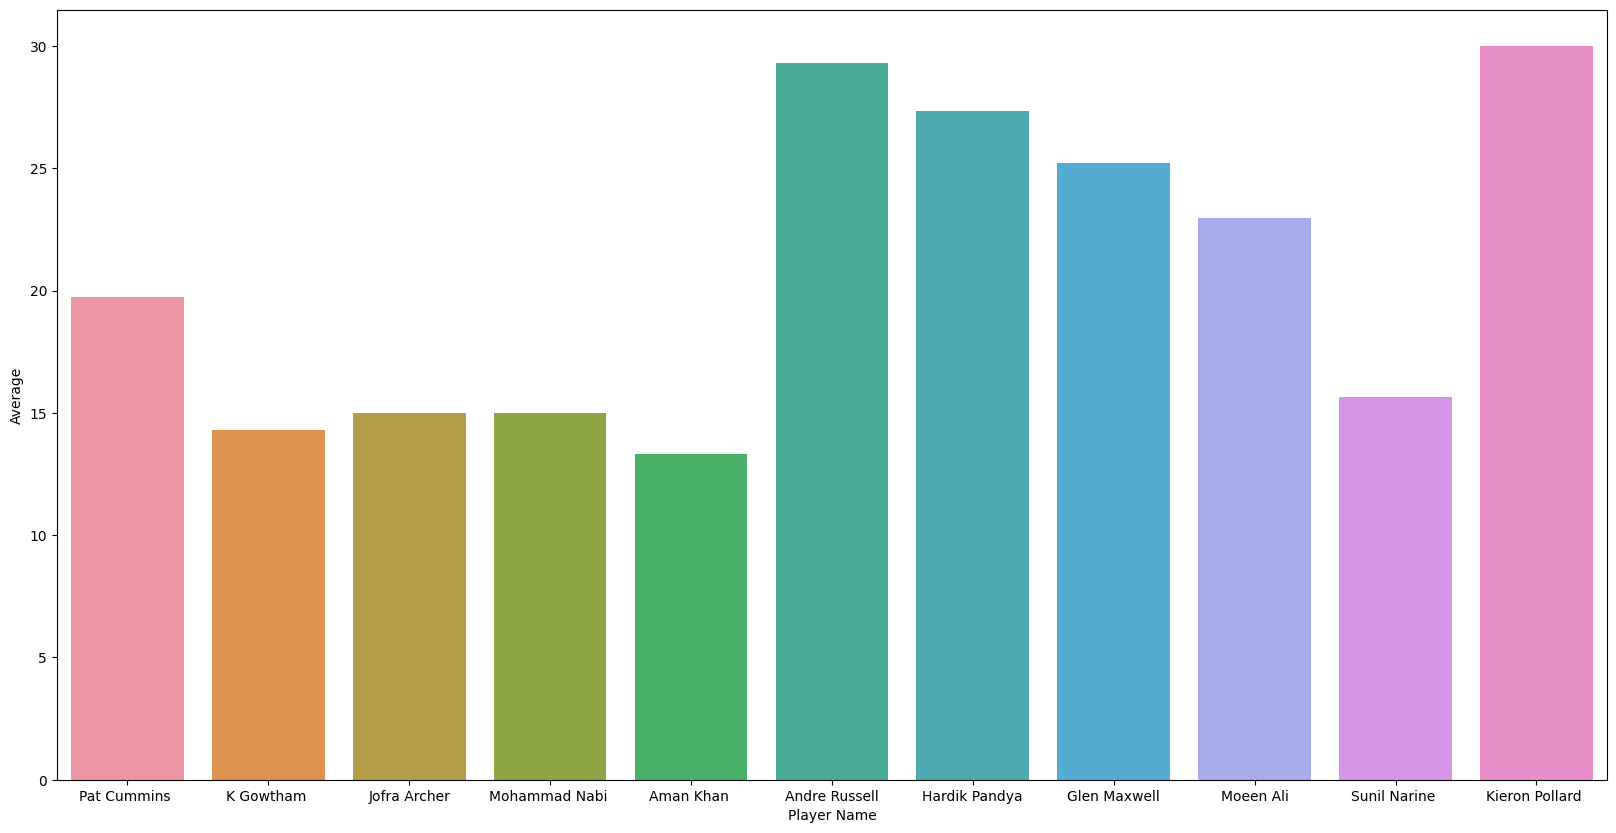

In [208]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Average', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Wickets'>

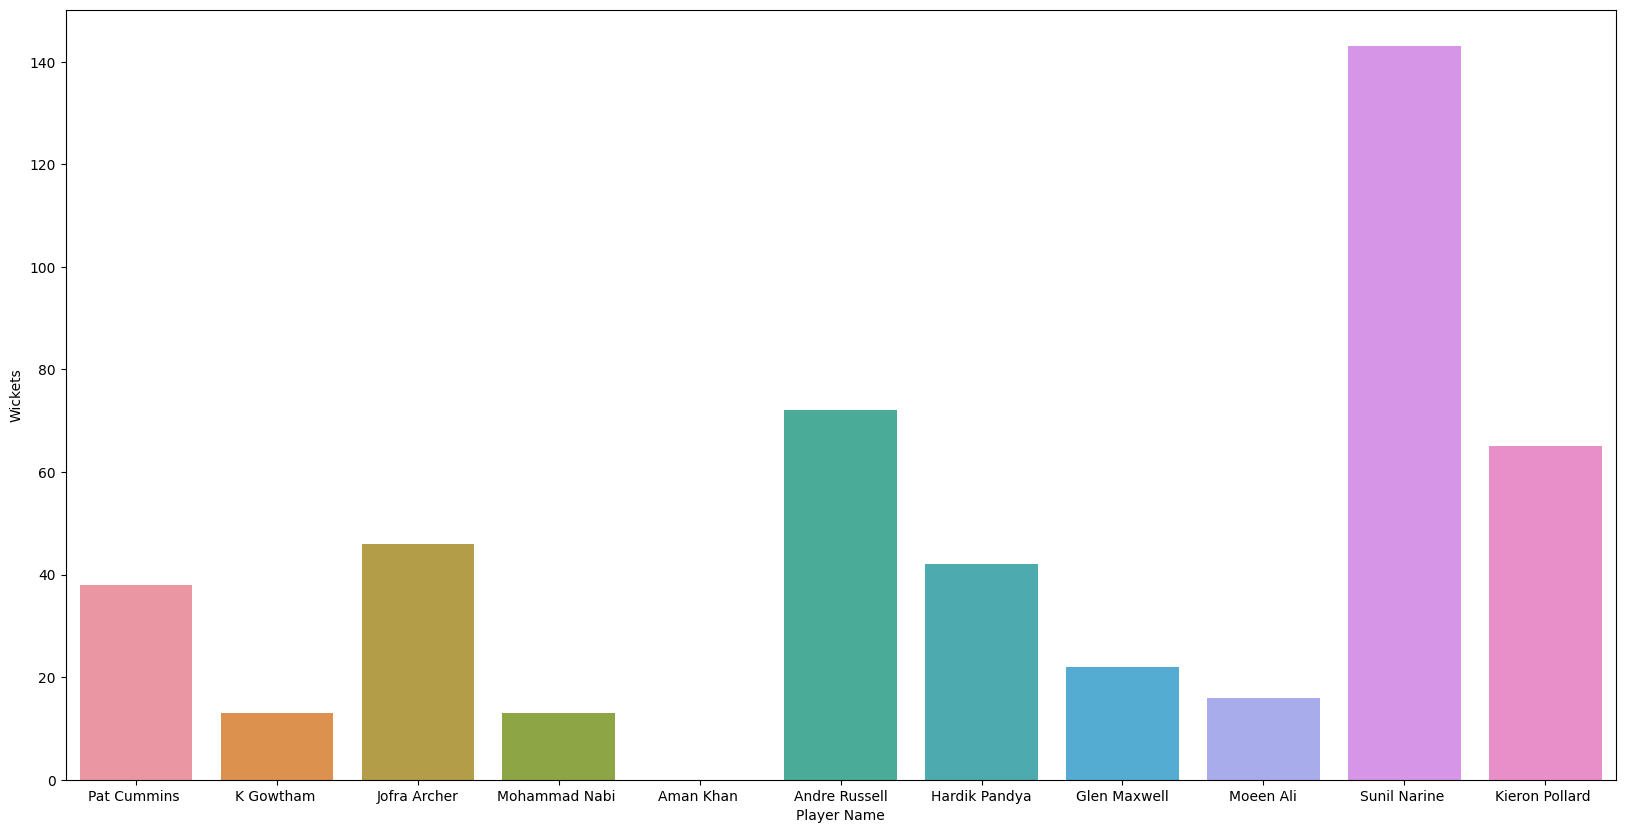

In [209]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Wickets', data=top_allrounders)

<Axes: xlabel='Player Name', ylabel='Catches'>

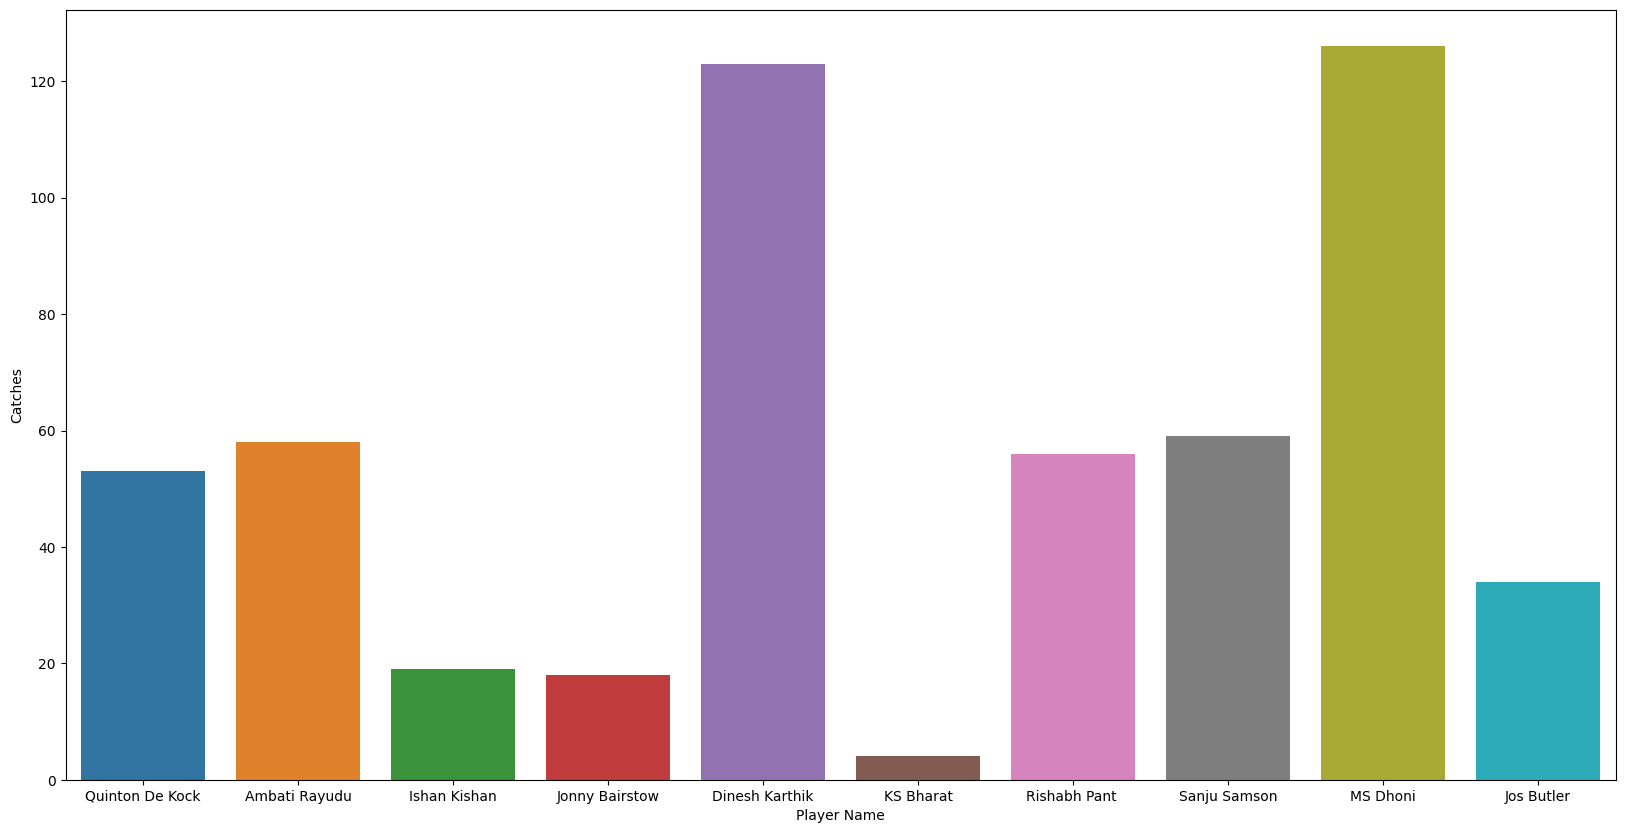

In [210]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Catches', data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Stumps'>

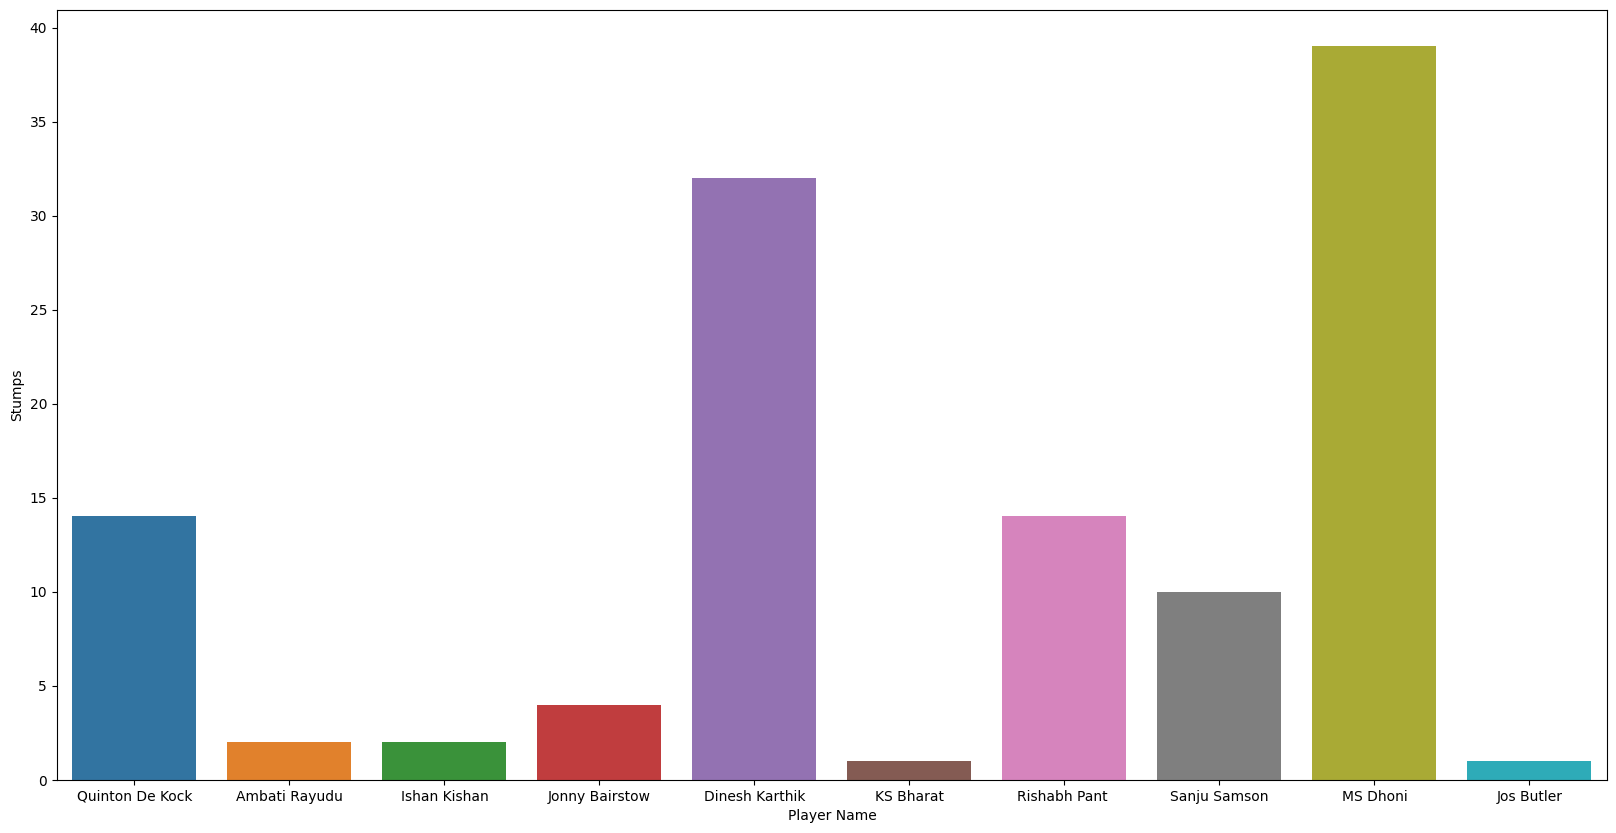

In [211]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Stumps', data=top_keepers)

Forming Our Best 11 for the Campaign based on the above analysis
1. We will consider the number of players from each category that the T20 world cup winning and the last year's IPL winning team played in
their Final matches.
2. The Australia squad consisted of - 3 Batters, 3 Allrounders, 4 Bowlers with 1 spin option and 1 wicket keeper.
3. The Chennai Squad Consisted of - 4 Batters, 3 Allrounders, 3 Bowlers and 1 Wicket Keeper.
4. For our final analysis we will consider the ratio of players in the best 11 as follows:

1. 3 Batters
2. 3 Allrounders
3. 4 Bowlers with 2 Spin Options
4. 1 Wicket Keeper

 


<Axes: title={'center': 'Average'}>

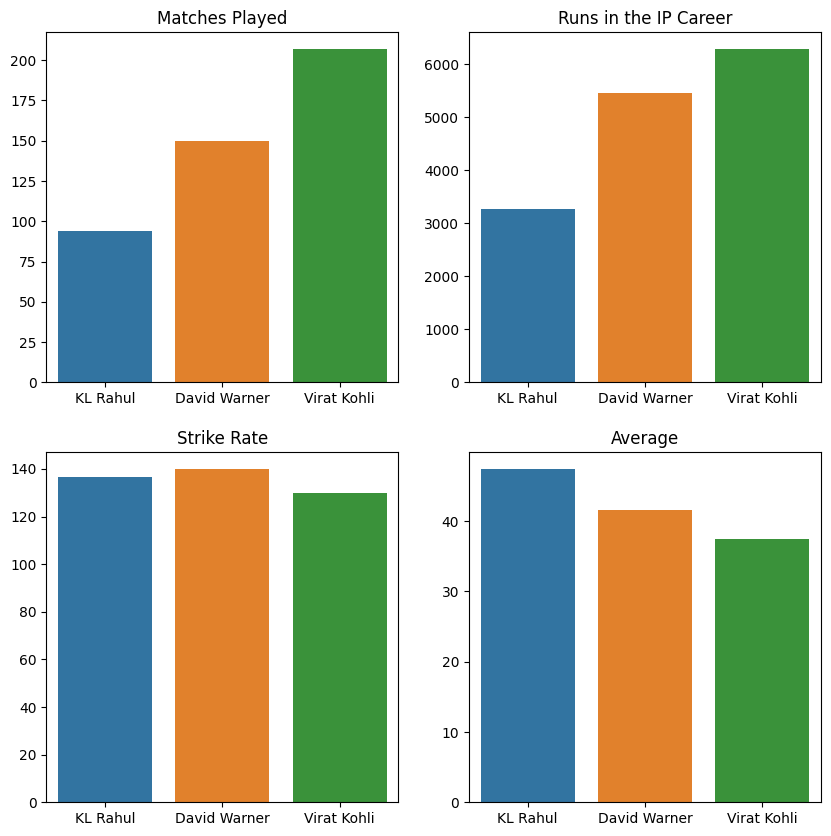

In [212]:
#Batters for the Final 11 - KL Virat Kohli, David Werner

#here, we are storing the values of each player in a separate dataframe to use for displaying using the barplot.
top_batters.reset_index(drop=True)
matches_values = [top_batters.iloc[6][ 'Matches_Played'], top_batters. iloc[2][ 'Matches_Played' ], top_batters.iloc[5]['Matches_Played']]
runs_values = [top_batters.iloc[6]['Runs'],top_batters. iloc[2]['Runs'],top_batters. iloc[5]['Runs']]
average_values = [top_batters. iloc[6]['Average' ],top_batters.iloc[2]['Average' ],top_batters. iloc[5]['Average' ]]
Strike_rate_values = [top_batters.iloc[6]['Strike_Rate' ], top_batters.iloc[2]['Strike_Rate' ], top_batters.iloc[5]['Strike_Rate' ]]
Labels = ['KL Rahul', 'David Warner', 'Virat Kohli']


fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0] .set_title("Matches Played")
axes[0][1].set_title("Runs in the IP Career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=Strike_rate_values, ax=axes[1][0])
sns.barplot(x=Labels, y=average_values, ax=axes[1][1])


<Axes: title={'center': 'Economy'}>

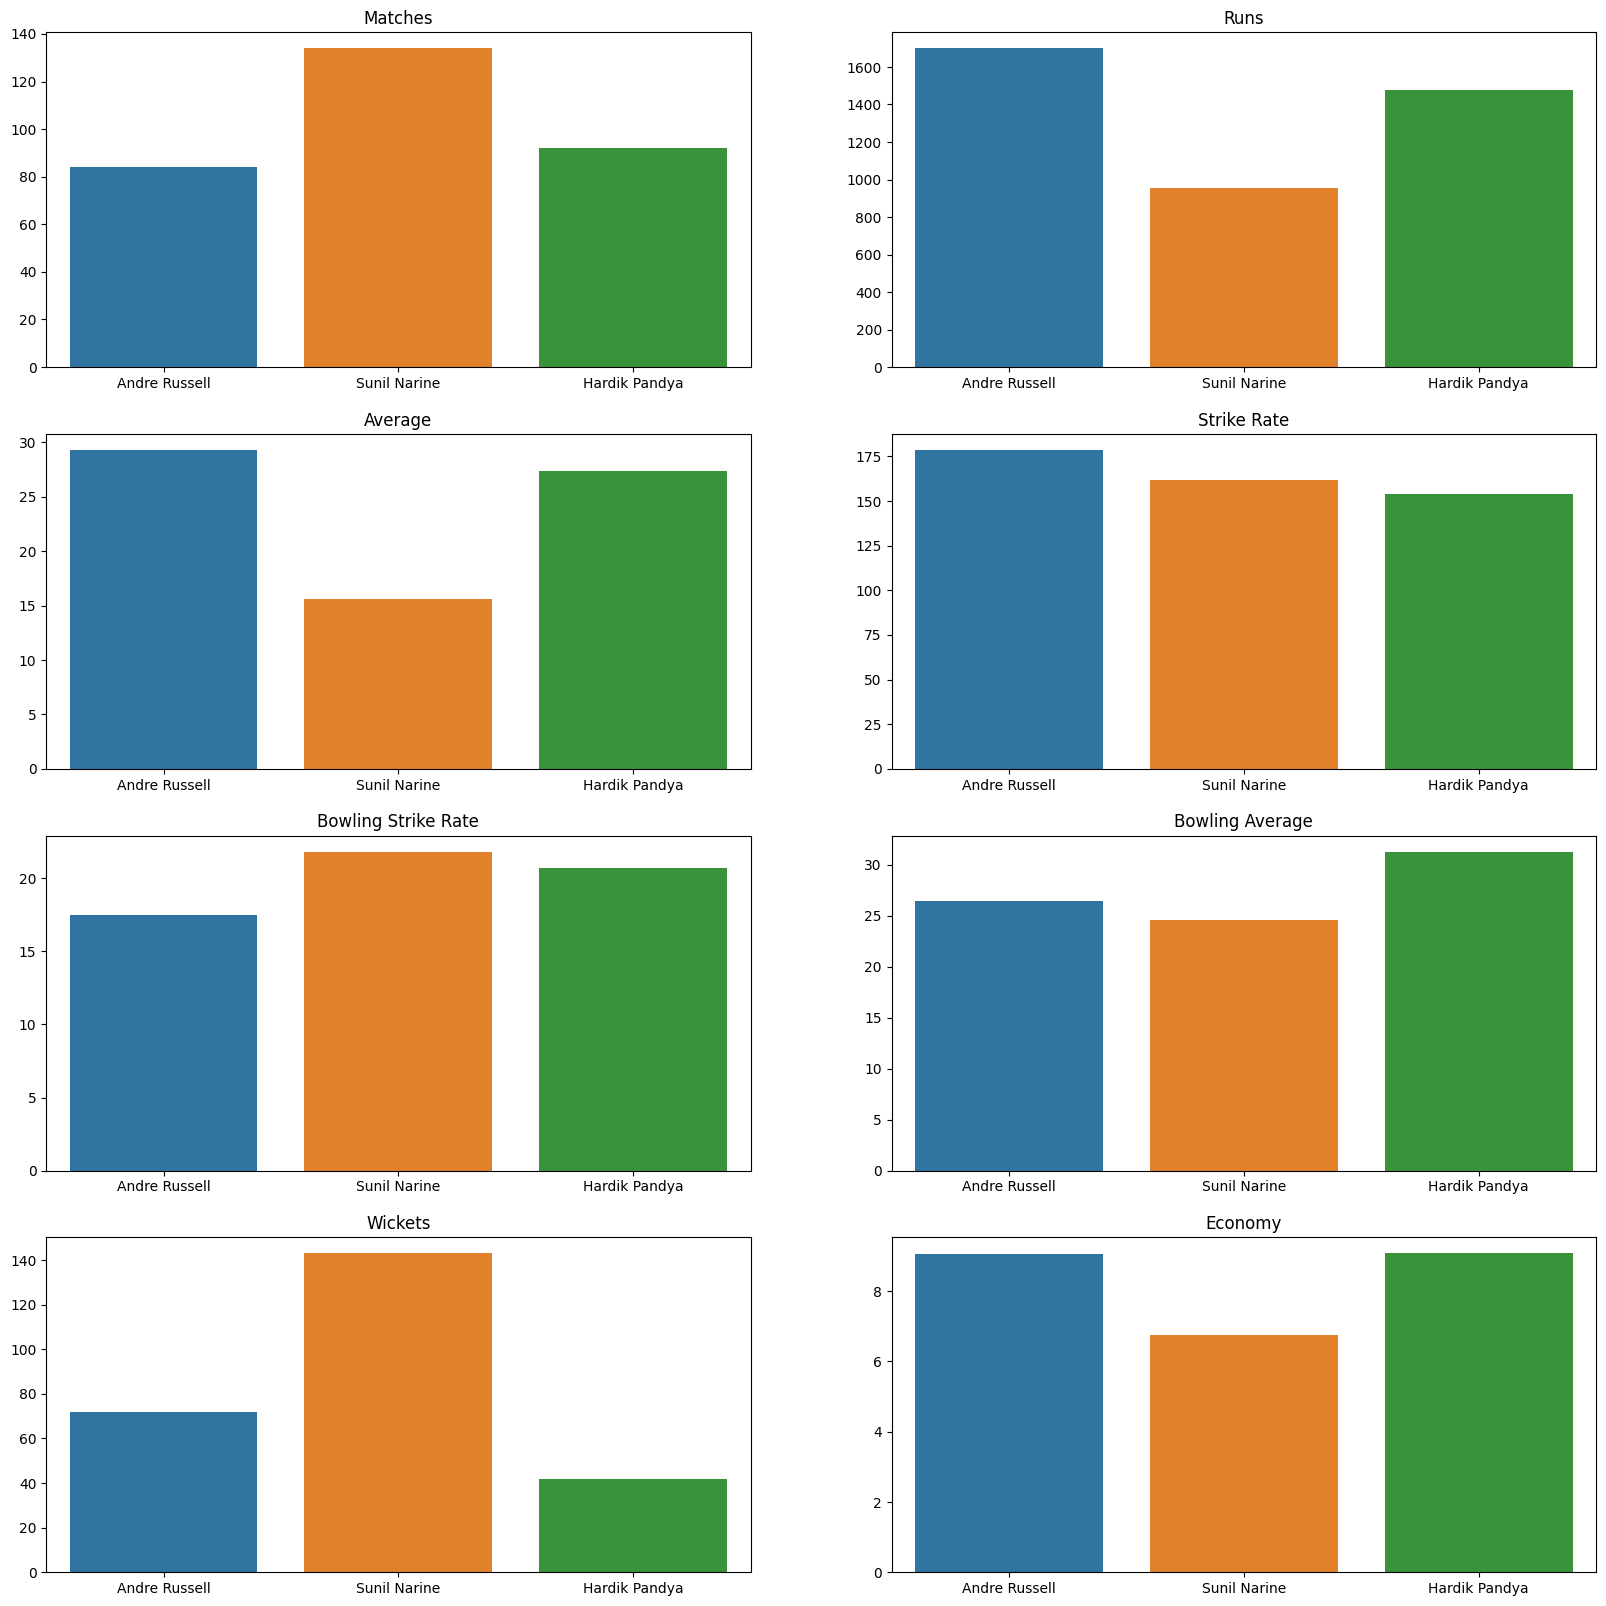

In [213]:
 

#Allrounders for the 1 11 - Andre Russell, Sunil Narine, Hardik Pandya

top_allrounders.reset_index(drop=True)

matches_values = [top_allrounders.iloc[5][ 'Matches_Played' ],top_allrounders.iloc[9][ 'Matches_Played' ],top_allrounders.iloc[6][ 'Matches_Played' ]]
runs_values = [top_allrounders.iloc[5][ 'Runs' ],top_allrounders.iloc[9][ 'Runs' ],top_allrounders.iloc[6][ 'Runs' ]]
average_values =[top_allrounders.iloc[5][ 'Average' ],top_allrounders.iloc[9][ 'Average' ],top_allrounders.iloc[6][ 'Average' ]]
bowling_strike_rate_values =[top_allrounders.iloc[5][ 'Bowling_Strike_Rate' ],top_allrounders.iloc[9][ 'Bowling_Strike_Rate' ],top_allrounders.iloc[6]['Bowling_Strike_Rate' ]]
bowling_average_values =[top_allrounders.iloc[5][ 'Bowling_average' ],top_allrounders.iloc[9][ 'Bowling_average' ],top_allrounders.iloc[6][ 'Bowling_average' ]]
wickets_values =[top_allrounders.iloc[5][ 'Wickets' ],top_allrounders.iloc[9][ 'Wickets' ],top_allrounders.iloc[6][ 'Wickets' ]]
economy_values = [top_allrounders.iloc[5][ 'Economy' ],top_allrounders.iloc[9][ 'Economy' ],top_allrounders.iloc[6][ 'Economy' ]]
strike_rate_values = [top_allrounders.iloc[5][ 'Strike_Rate' ],top_allrounders.iloc[9][ 'Strike_Rate' ],top_allrounders.iloc[6][ 'Strike_Rate' ]]

Labels = ['Andre Russell', 'Sunil Narine', 'Hardik Pandya' ]

fig, axes = plt.subplots(4,2, figsize=(20,20))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling Average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=average_values, ax=axes[1][0])
sns.barplot(x=Labels, y=strike_rate_values,ax=axes[1][1])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[2][0])
sns.barplot(x=Labels, y=bowling_average_values,ax=axes[2][1])
sns.barplot(x=Labels, y=wickets_values,ax=axes[3][0])
sns.barplot(x=Labels, y=economy_values, ax=axes[3][1])


<Axes: title={'center': 'Economy'}>

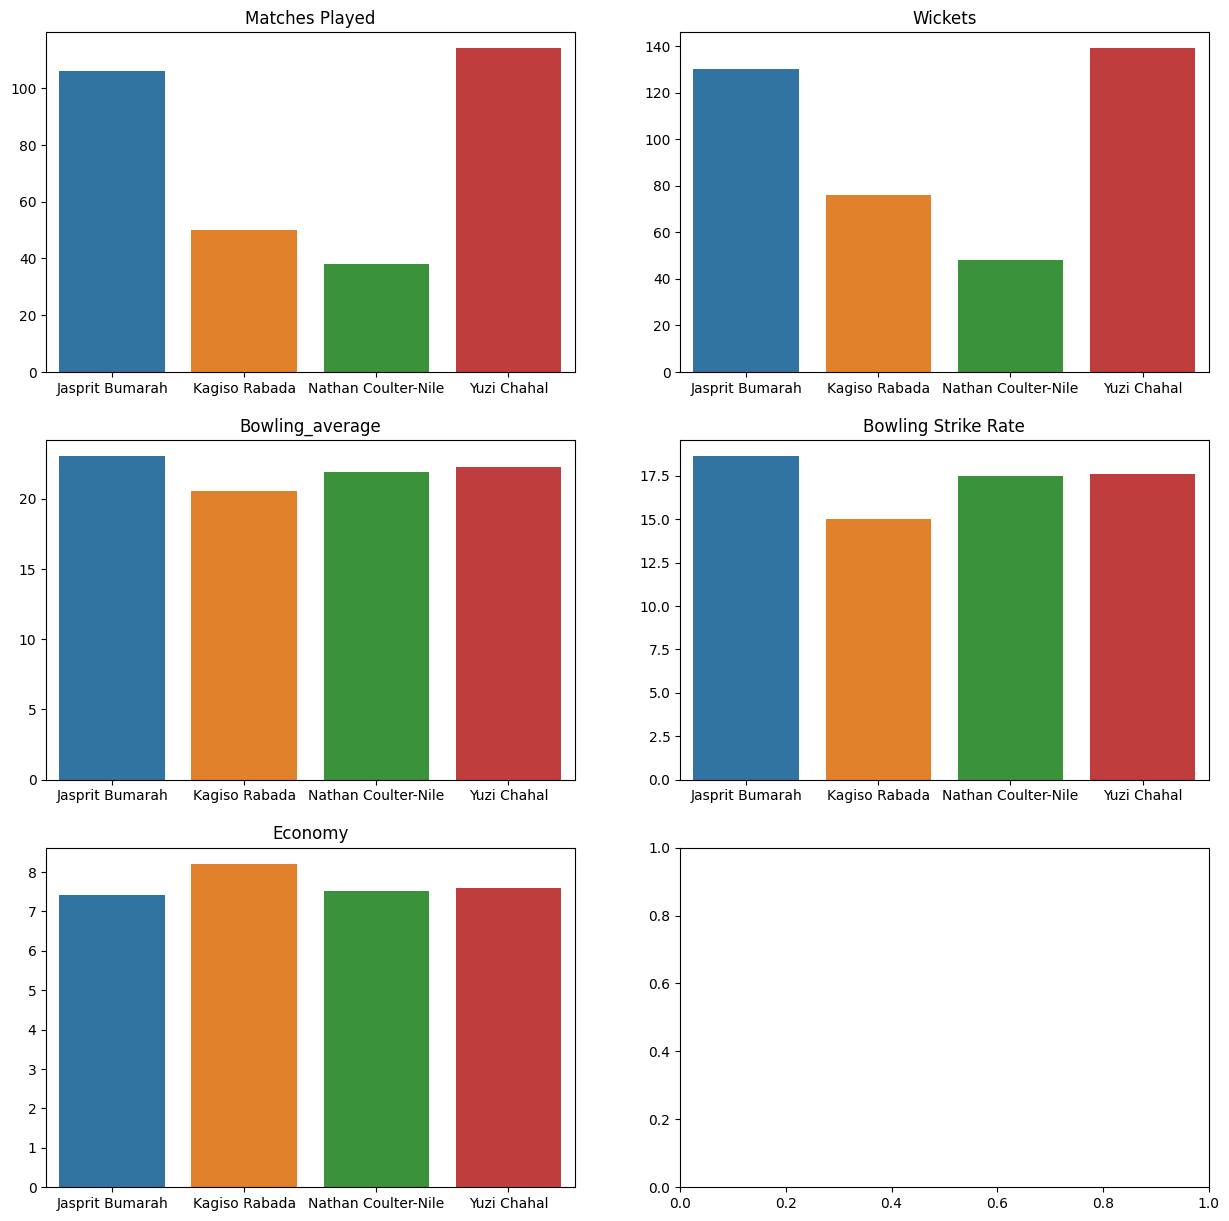

In [214]:
#Bowlers for the final 11 - Jasprit Bumrah, Kagiso Rabada, Nathan Coulter-Mile, Yuzi Chahal

top_bowlers.reset_index(drop=True)

matches_values = [top_bowlers. iloc[10][ 'Matches_Played'], top_bowlers.iloc[0][ 'Matches_Played'],top_bowlers.iloc[7][ 'Matches_Played'], top_bowlers.iloc[1][ 'Matches_Played']]

wickets_values =[top_bowlers. iloc[10][ 'Wickets'], top_bowlers.iloc[0][ 'Wickets'],top_bowlers.iloc[7][ 'Wickets'], top_bowlers.iloc[1][ 'Wickets']]

bowling_average_values =[top_bowlers. iloc[10][ 'Bowling_average'], top_bowlers.iloc[0][ 'Bowling_average'],top_bowlers.iloc[7][ 'Bowling_average'], top_bowlers.iloc[1][ 'Bowling_average']]
bowling_strike_rate_values = [top_bowlers. iloc[10][ 'Bowling_Strike_Rate'], top_bowlers.iloc[0][ 'Bowling_Strike_Rate'],top_bowlers.iloc[7][ 'Bowling_Strike_Rate'], top_bowlers.iloc[1][ 'Bowling_Strike_Rate']]
economy_values = [top_bowlers. iloc[10][ 'Economy'], top_bowlers.iloc[0][ 'Economy'],top_bowlers.iloc[7][ 'Economy'], top_bowlers.iloc[1][ 'Economy']]

Labels = ['Jasprit Bumarah', 'Kagiso Rabada', 'Nathan Coulter-Nile', 'Yuzi Chahal']



fig, axes = plt.subplots(3,2, figsize=(15,15))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling_average")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[1][1])
sns.barplot(x=Labels, y=economy_values, ax=axes[2][0])

  


<Axes: title={'center': 'Keeping Stats'}>

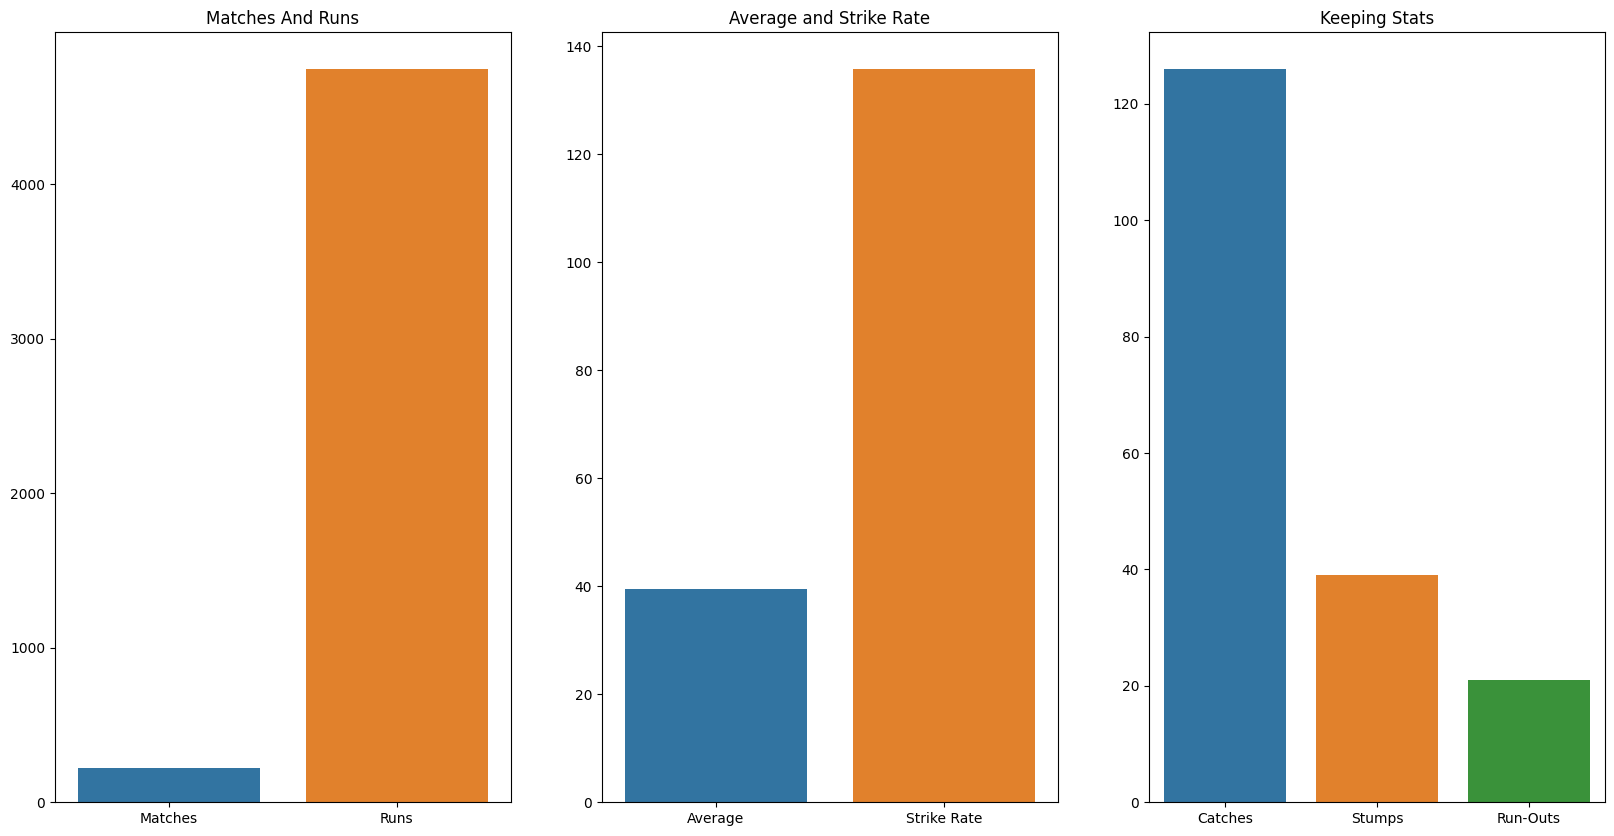

In [215]:
#Wicket Keeper For The Final 11 - MS Dhoni

matches_values = [top_keepers. iloc[8][ 'Matches_Played' ], top_keepers. iloc[8]['Runs']]
average_values = [top_keepers.iloc[8][ 'Average' ],top_keepers.iloc[8][ 'Strike_Rate']]
keeping_values = [top_keepers.iloc[8][ 'Catches' ], top_keepers.iloc[8]['Stumps' ], top_keepers. iloc[8]['Run_outs']]

label1 = ['Matches', 'Runs']

label2 = ['Average', 'Strike Rate']

label3 = ['Catches', 'Stumps', 'Run-Outs']

fig, axes = plt.subplots(1,3, figsize=(20,10)) 
axes[0].set_title("Matches And Runs")
axes[1].set_title("Average and Strike Rate")
axes[2].set_title("Keeping Stats")

sns.barplot(x=label1, y=matches_values, ax=axes[0])
sns.barplot(x=label2, y=average_values, ax=axes[1])
sns.barplot(x=label3, y=keeping_values, ax=axes[2])


# ***Final 11 for IPL***

In [237]:
batter1 = top_batters.loc[(top_batters["Player Name"] == 'KL Rahul ')]
batter2 = top_batters.loc[(top_batters["Player Name"] == 'David Warner ')]
batter3 = top_batters.loc[(top_batters["Player Name"] == 'Virat Kohli')]

bowler1 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Yuzvendra Chahal ')]
bowler2 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Jasprit Bumrah')]
bowler3 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Nathan Coulter-Nile')]
bowler4= top_bowlers.loc[(top_bowlers["Player Name"] == 'Kagiso Rabada ')]

allrounder1 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Andre Russell')]
allrounder2 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Sunil Narine ' )]
allrounder3 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Hardik Pandya')]

keeper = top_keepers.loc[(top_keepers["Player Name"] == 'MS Dhoni')]


In [238]:
final=[batter1, batter2, batter3, allrounder1, allrounder2, allrounder3, keeper, bowler1, bowler2, bowler3, bowler4]
final_team = pd.concat(final)
final_team = final_team.drop(labels=['Matches_Played','Runs', 'Average','Strike_Rate','Wickets','Bowling_average', 'Economy','Bowling_Strike_Rate','Catches', 'Run_outs', 'Stumps'], axis=1)

final_team.reset_index(drop=True)


,Player Name,Team,Nationality
0,KL Rahul,Lucknow,Indian
1,David Warner,Delhi,Overseas
2,Virat Kohli,Bangalore,Indian
3,Andre Russell,Kolkata,Overseas
4,Sunil Narine,Kolkata,Overseas
5,Hardik Pandya,Gujarat,Indian
6,MS Dhoni,Chennai,Indian
7,Yuzvendra Chahal,Rajasthan,Indian
8,Jasprit Bumrah,Mumbai,Indian
9,Nathan Coulter-Nile,Rajasthan,Overseas
